## Aggregate the network with an optimization method

In [44]:
import sys
sys.path.append('../src')
import utils_mistral as utils
import test_mistral as models
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import product
import xarray as xr
import importlib

importlib.reload(models)
importlib.reload(utils)

<module 'utils_mistral' from 'c:\\Users\\g630d\\Documents\\00_Cours\\2024-2025_MIT\\00 Thesis\\Dev\\notebooks\\../src\\utils_mistral.py'>

In [5]:
config = utils.Config(demand = "total_demand")

In [6]:
nodes_df, demand_df, wind_df, solar_df = utils.DataProcessor.import_and_interpolate_data(config)

Number of duplicates deleted in nodes_df: 2238


In [7]:
# Load CSV data
TimeSeries = {'wind': wind_df, 'solar': solar_df};

In [8]:
network = utils.Network(nodes_df, demand_df, TimeSeries, config)

The 'features' dictionary has been created and can be accessed as '.features'
It is a dictionary with keys for each node in range(0, 2605).
Each value is a dictionary with the features of that node.

Example structure:
network.features[0].keys() = dict_keys(['position', 'time_series', 'duration_curves', 'ramp_duration_curves', 'correlation', 'supply_demand_mismatch'])

Details:
  - Position: A tuple (latitude, longitude) of that node.
  - Time series: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the time series itself.
  - Duration Curves: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the duration curve of the time series.
  - Ramp Duration Curves (RDCs): A dictionary with keys for each time series type dict_keys(['wind', 'solar'])
    and values as the RDC (found by differentiating and subsequently sorting) of the time series.
  - Correlation: A dictionary with keys as tuples of 

In [9]:
aggregator = models.Aggregation(network.features, config)

In [10]:
assignment_matrix_result, representative_vector_result = aggregator.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-06
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 6788631 rows, 6788630 columns and 20360680 nonzeros
Model fingerprint: 0x4427af3e
Variable types: 0 continuous, 6788630 integer (6788630 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-07, 7e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve removed 0 rows and 0 columns (presolve time = 8s) ...
Presolve removed 0 rows and 0 columns (presolve time = 10s) ...
Presolve removed 0 rows and 0 columns (presolve time = 16s) ...
Presolve removed 0 rows and 0 columns (presolve time = 20s) ...
Presolve removed 0 rows and 0 columns (presolve time = 25s) ...
Presolve removed

In [11]:
cluster_assignment_dict, cluster_centers = aggregator.cluster_KMedoids()

In [14]:
eval_KMedoids = aggregator.compute_metrics(aggregation_method = 'kmedoids', type="custom")

UnboundLocalError: cannot access local variable 'weights' where it is not associated with a value

In [19]:
eval_opti = aggregator.compute_metrics(aggregation_method = 'optimization', type="custom")

In [59]:
importlib.reload(utils)
visualizer = utils.Visualization(aggregator)

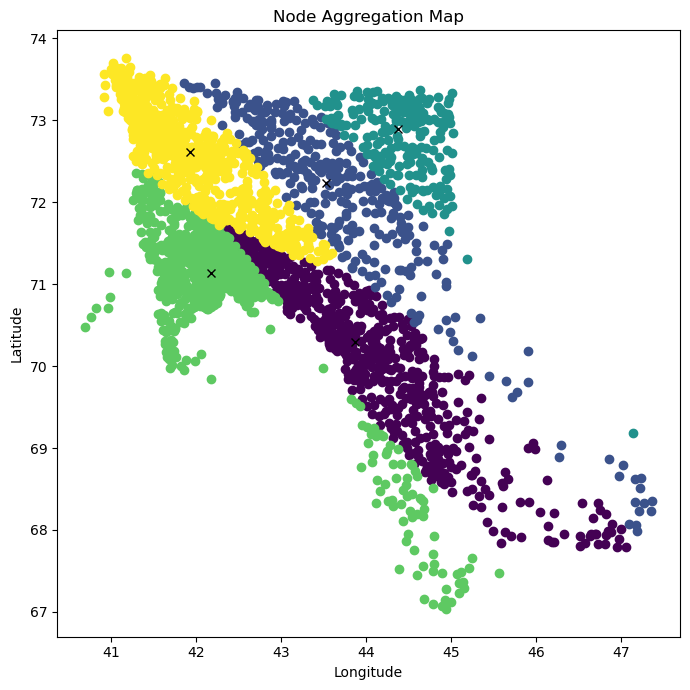

In [ ]:
visualizer.plot_map(aggregation_method='optimization')

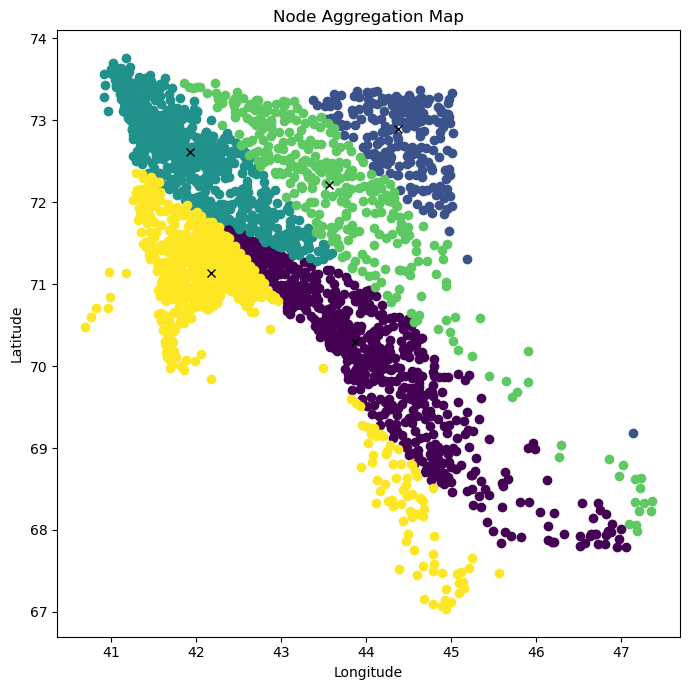

In [61]:
visualizer.plot_map(aggregation_method='kmedoids')

In [62]:
cluster_centers


[113, 1015, 2578, 674, 1825]

In [63]:
opti_rep = [index for index, value in enumerate(representative_vector_result) if value == 1]
opti_rep

[113, 672, 1015, 1825, 2578]

In [66]:
print('kmedoids')
print('- Number of clusters: ', len(cluster_centers))
print('- Representatives: ', cluster_centers)
print('- Number of nodes in each cluster:')
for i in range(len(cluster_centers)):
    print(f'  Cluster {i}: {len(cluster_assignment_dict[i])} nodes')

print("optimization")
print('- Number of clusters: ', len(opti_rep))
print('- Representatives: ', opti_rep)
print('- Number of nodes in each cluster:')
for i in range(len(opti_rep)):
    print(f'  Cluster {i}: {int(assignment_matrix_result[:, opti_rep[i]].sum())} nodes')

kmedoids
- Number of clusters:  5
- Representatives:  [113, 1015, 2578, 674, 1825]
- Number of nodes in each cluster:
  Cluster 0: 639 nodes
  Cluster 1: 227 nodes
  Cluster 2: 647 nodes
  Cluster 3: 327 nodes
  Cluster 4: 765 nodes
optimization
- Number of clusters:  5
- Representatives:  [113, 672, 1015, 1825, 2578]
- Number of nodes in each cluster:
  Cluster 0: 639 nodes
  Cluster 1: 325 nodes
  Cluster 2: 229 nodes
  Cluster 3: 765 nodes
  Cluster 4: 647 nodes
